In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy
from __future__ import unicode_literals
from Learning import QLearning, EpsilonGreedyExploration, FixedPolicy


In [3]:
# simulate random policy until reached target state
g = Gridworld(gridworld_length=10)      

policy_score = simulate_policy(g, policy_type="random", run_to_completion=True)

print(policy_score)


-1.9083869602132106


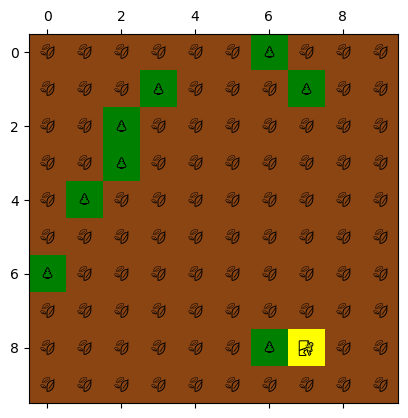

In [4]:
visualize_grid(g)

In [124]:
g_rand = Gridworld(gridworld_length=3, gridworld_width=3, num_obstacles=0,
                 collisionReward= -1, destinationReward= 100, defaultReward= -0.1, outOfBoundsReward = -1, failChance= 0.1, gamma= 0.9)
eps_greedy_policy =  EpsilonGreedyExploration(0.8, alpha=0.99)
qlearning_model = QLearning(g_rand, 0.2)
print(qlearning_model.Q.shape)
print(qlearning_model.Q[tuple([0, 0, 0, 0, 0, 0, 0])])

(3, 3, 4, 3, 3, 3, 6)
0.0


In [125]:
for i in range(1000):
    g_rand.reset_position()
    simulate_policy(g_rand, policy_type="epsilon-greedy", model=qlearning_model, policy=eps_greedy_policy, run_to_completion=False, num_iters=1000, visualize=False)

In [130]:
learned_policy = FixedPolicy(qlearning_model.extract_policy(), g_rand)
print(learned_policy.policy)
#print(qlearning_model.Q)

[[[[[[1 0 5]
     [0 0 0]
     [2 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 0 0]
     [0 0 0]
     [2 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[5 0 0]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[1 0 1]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[4 0 0]
     [0 0 0]
     [0 0 0]]]]



  [[[[1 0 1]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[2 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[0 0 0]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[4 0 1]
     [0 0 0]
     [5 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[5 0 0]
     [0 0 0]
     [0 0 0]]]


   [[[0 0 1]
     [0 0 0]
     [1 0 0]]

    [[0 0 0]
     [0 0 0]
     [0 0 0]]

    [[1 0 0]
     [0 0 0]
     [0 0 0]]]]

In [127]:
# reset agent position in existing grid
g_rand.reset_position()

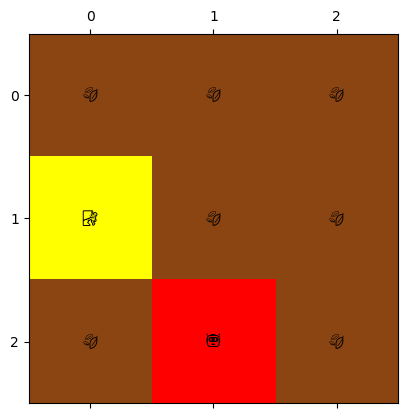

In [128]:
visualize_grid(g_rand)

KeyboardInterrupt: 

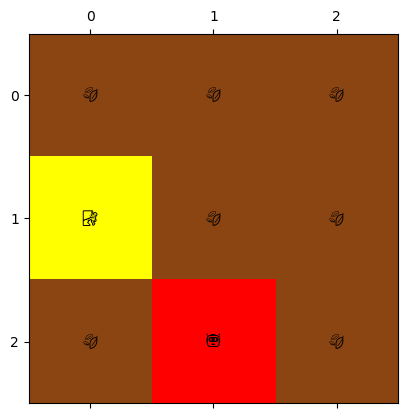

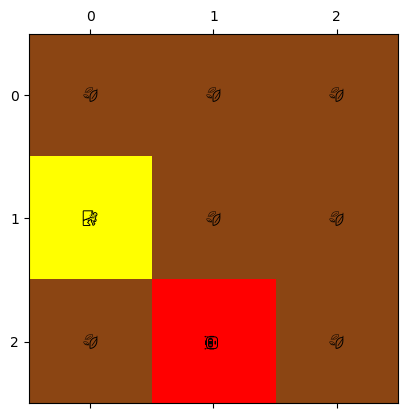

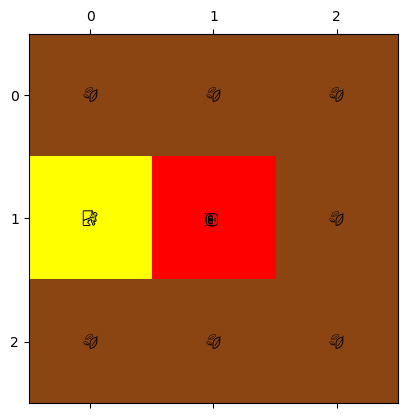

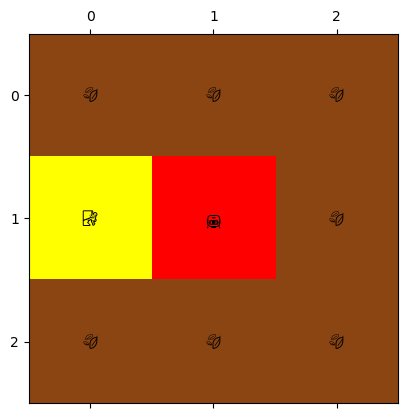

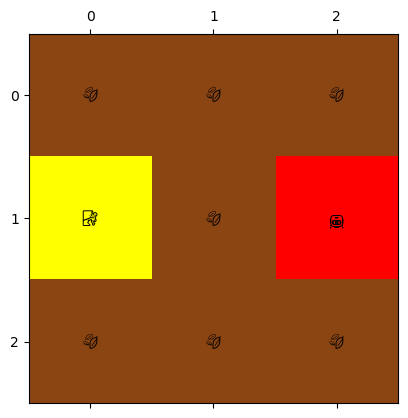

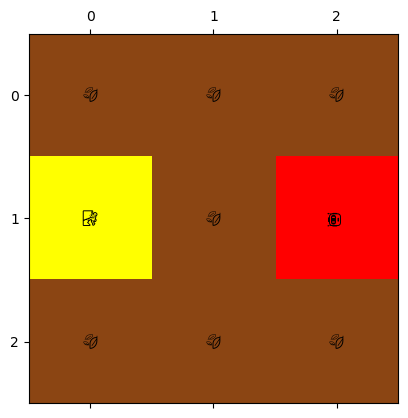

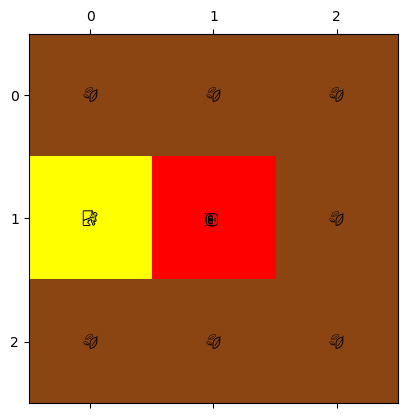

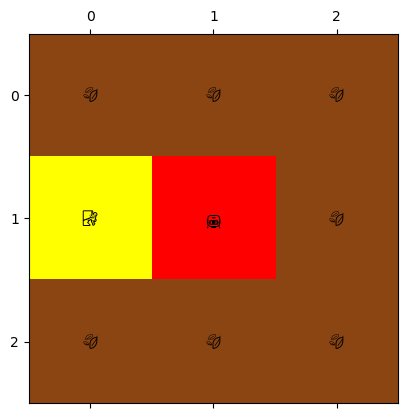

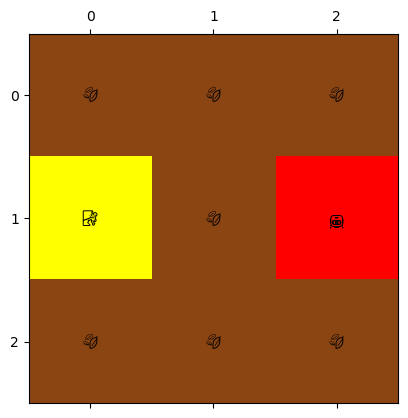

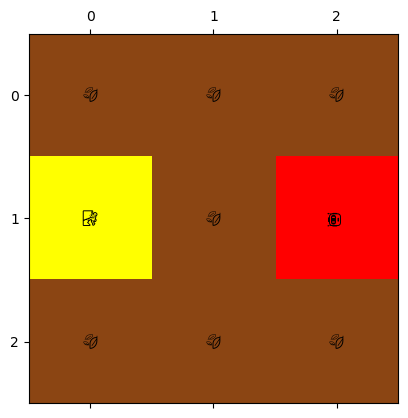

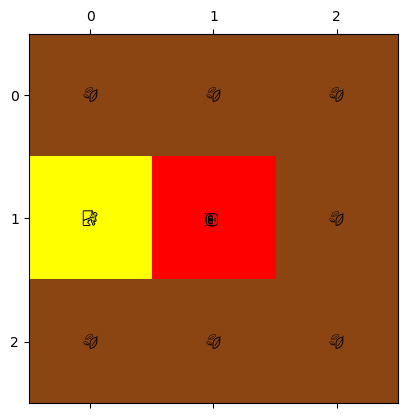

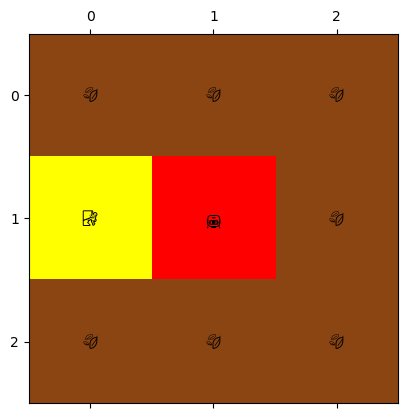

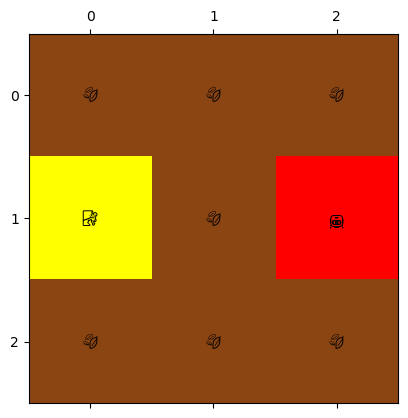

Error in callback <function flush_figures at 0x00000200F2799DC0> (for post_execute):


KeyboardInterrupt: 

In [129]:
policy_score_learned = simulate_policy(g_rand, policy_type="fixed", model=None, policy=learned_policy, run_to_completion=True)

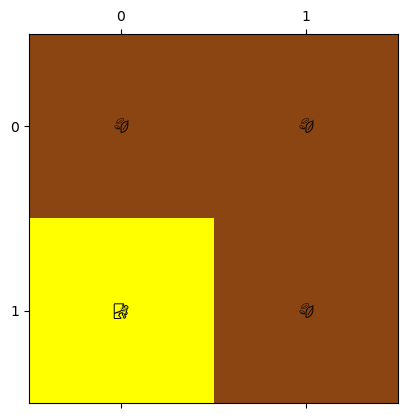

In [123]:
visualize_grid(g_rand)

In [119]:
print(policy_score_learned)

89.9
